In [6]:
from typing import Annotated, Optional, Literal

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


# Define states with proper type hints for all expected fields
class DocumentState(TypedDict, total=False):
    document: str  # Document text content
    type: str  # Document classification type
    extracted: str  # Extracted information from the document
    query:str # query of the user


# Define nodes
def load_document(state: DocumentState) -> DocumentState:
    print("Loading document...")
    processed_data = {'filename': 'sample-invoice', 'filepath': '/Users/ajeet/Data/Development/sample_documents/sample-invoice.pdf', 'context': 'CPB Software (Germany) GmbH - Im Bruch 3 - 63897 Miltenberg/Main\n\n\nMusterkunde AG\nMr. John Doe\nMusterstr. 23\n12345 Musterstadt                                                                      Name: Stefanie Müller\n                                                                                       Phone: +49 9371 9786-0\n\n\n\n\nInvoice WMACCESS Internet\n\nVAT No. DE199378386\n            Invoice No                       Customer No                      Invoice Period                       Date\n             123100401                             12345                  01.02.2024 - 29.02.2024               1. März 2024\n\n                                                                        Amount\n                       Service Description                                                   quantity           Total Amount\n                                                                     -without VAT-\nBasic Fee wmView                                                            130,00 €                       1               130,00 €\nBasis fee for additional user accounts                                       10,00 €                       0                    0,00 €\nBasic Fee wmPos                                                              50,00 €                       0                    0,00 €\nBasic Fee wmGuide                                                         1.000,00 €                       0                    0,00 €\nChange of user accounts                                                      10,00 €                       0                    0,00 €\nTransaction Fee T1                                                            0,58 €                      14                    8,12 €\nTransaction Fee T2                                                            0,70 €                       0                    0,00 €\nTransaction Fee T3                                                            1,50 €                     162               243,00 €\nTransaction Fee T4                                                            0,50 €                       0                    0,00 €\nTransaction Fee T5                                                            0,80 €                       0                    0,00 €\nTransaction Fee T6                                                            1,80 €                       0                    0,00 €\nTransaction Fee G1                                                            0,30 €                       0                    0,00 €\nTransaction Fee G2                                                            0,30 €                       0                    0,00 €\nTransaction Fee G3                                                            0,40 €                       0                    0,00 €\nTransaction Fee G4                                                            0,40 €                       0                    0,00 €\nTransaction Fee G5                                                            0,30 €                       0                    0,00 €\nTransaction Fee G6                                                            0,30 €                       0                    0,00 €\n                                                                     Total                                                 381,12 €\n                                                                     VAT 19 %                                                  72,41 €\n                                                                     Gross Amount incl. VAT                                453,53 €\n\n\n\nTerms of Payment: Immediate payment without discount. Any bank charges must be paid by the invoice recipient.\nBank fees at our expense will be charged to the invoice recipient!\n\n\nPlease credit the amount invoiced to IBAN DE29 1234 5678 9012 3456 78 | BIC GENODE51MIC (SEPA Credit Transfer)\n\n\n\nThis invoice is generated automatically and will not be signed\n\x0c                                                         Invoice Details\n                                     Period:            01.02.2024                  to          29.02.2024\n\nUnit:               Musterkunde AG                                                                            12345\n\n\nRequest sections:        T1:        T2:       T3:     T4:       T5:       T6:       G1:       G2:       G3:       G4:       G5:       G6:\nAmount in Euro:           0,58       0,70      1,50    0,50      0,80      1,80      0,30      0,30      0,40      0,40      0,30      0,30\n\n\n\nuser-account-1                 10         0      99         0         0         0         0         0         0         0         0         0   154,30 €\nuser-account-2                 4          0      63         0         0         0         0         0         0         0         0         0    96,82 €\n\n\n\n\nTransaction Fee Seg      T1:        T2:      T3:      T4:       T5:       T6:       G1:       G2:       G3:       G4:       G5:       G6:\nQueries in Total:           14           0     162         0         0         0         0         0         0         0         0         0\nTotal in Euro:           8,12 €     0,00 € 243,00 €   0,00 €    0,00 €    0,00 €    0,00 €    0,00 €    0,00 €    0,00 €    0,00 €    0,00 €    251,12 €\n\nThe explanation of the query fee categories (T1 to T6 and G1 to G6) can be found on our website:\nhttps://www.wmaccess.com/abfragekategorien\n\x0c                    Invoice Details for wmView Query Reference\n                            Period:   01.02.2024          to         29.02.2024\n\nUnit:             Musterkunde AG                                                  12345\n\n\n                                               wmview, wmProfile and User Profiles Query Segments:\nQuery Reference:                               T1:      T2:       T3:      T4:        T5:      T6:\n\n\n*Not specified*                                      4         0       9         0         0         0   15,82 €\nAZR/31/27439                                         0         0      12         0         0         0   18,00 €\nCCL/3715                                             0         0       4         0         0         0    6,00 €\nCRS/28432                                            5         0      36         0         0         0   56,90 €\nCs/52113                                             0         0      19         0         0         0   28,50 €\nGS 32090                                             1         0       7         0         0         0   11,08 €\nKpi/22695                                            2         0       6         0         0         0   10,16 €\nPG 7772                                              0         0      11         0         0         0   16,50 €\nRjn/11138                                            0         0      15         0         0         0   22,50 €\nSF-M 596/99-08                                       0         0       5         0         0         0    7,50 €\nTtrb/17885                                           1         0      23         0         0         0   35,08 €\nWPN:24791                                            1         0       4         0         0         0    6,58 €\nWwt/15658                                            0         0      11         0         0         0   16,50 €\n\n\n\n\n                                                           Price for each Query in Euro:\n                                                   0,58   0,70       1,50     0,50       0,80   1,80\n\x0c', 'classification': {'doc_type': 'invoice'}, 'doc_type': 'digital_pdf'}
    
    # Add document to state
    state["document"] = processed_data['context']
    return state


def classify(state: DocumentState) -> DocumentState:
    print("Classifying document...")
    # Get document text
    doc = state["document"]
    
    # Remove potentially problematic debugging line that accesses a specific character
    # print("inside classify", doc[10])  # This could cause issues if doc is empty
    
    # Proper classification logic
    if "contract" in doc.lower():
        state["type"] = "contract"
    elif "invoice" in doc.lower():
        state["type"] = "invoice"
    else:
        state["type"] = "general"
    
    print(f"Document classified as: {state['type']}")
    return state


def contract_extraction(state: DocumentState) -> DocumentState:
    print("Extracting contract data...")
    state["extracted"] = "contract_fields"
    return state


def invoice_extraction(state: DocumentState) -> DocumentState:
    print("Extracting invoice data...")
    state["extracted"] = "invoice_fields"
    return state


def general_extraction(state: DocumentState) -> DocumentState:
    print("Extracting general data...")
    state["extracted"] = "general_fields"
    return state


# Router function
def route_by_type(state: DocumentState) -> str:
    doc_type = state.get("type", "general")  # Default to general if type is missing
    if doc_type == "contract":
        return "contract"
    elif doc_type == "invoice":
        return "invoice"
    else:
        return "general"


# Build the graph
graph_builder = StateGraph(DocumentState)

# Build the graph
graph_builder = StateGraph(DocumentState)
graph_builder.add_node("load_document", load_document)
# graph_builder.add_node("ocr", ocr)
graph_builder.add_node("classify", classify)
graph_builder.add_node("contract", contract_extraction)
graph_builder.add_node("invoice", invoice_extraction)
graph_builder.add_node("general", general_extraction)

graph_builder.set_entry_point("load_document")
graph_builder.add_edge("load_document", "classify")
graph_builder.add_conditional_edges(
    "classify",
    route_by_type,
    {
        "contract": "contract",
        "invoice": "invoice",
        "general": "general"
    }
)
graph_builder.add_edge("contract", END)
graph_builder.add_edge("invoice", END)
graph_builder.add_edge("general", END)

# Compile the graph
graph = graph_builder.compile()



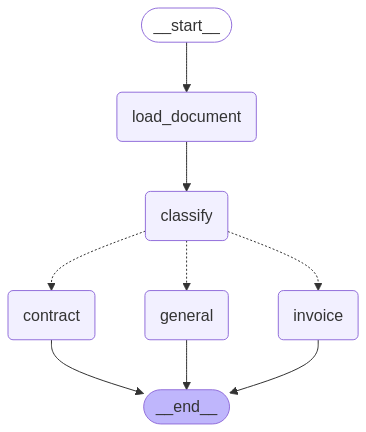

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Error",e)
    # This requires some extra dependencies and is optional
    pass

In [8]:
ini_state: DocumentState = {"query":""} 
final_state = graph.invoke(ini_state)
print("\nFinal State:", final_state)

Loading document...
Classifying document...
Document classified as: invoice
Extracting invoice data...

Final State: {'document': 'CPB Software (Germany) GmbH - Im Bruch 3 - 63897 Miltenberg/Main\n\n\nMusterkunde AG\nMr. John Doe\nMusterstr. 23\n12345 Musterstadt                                                                      Name: Stefanie Müller\n                                                                                       Phone: +49 9371 9786-0\n\n\n\n\nInvoice WMACCESS Internet\n\nVAT No. DE199378386\n            Invoice No                       Customer No                      Invoice Period                       Date\n             123100401                             12345                  01.02.2024 - 29.02.2024               1. März 2024\n\n                                                                        Amount\n                       Service Description                                                   quantity           Total Amount\n                    

In [9]:
import inspect


# retrieve the function's signature
sig = inspect.signature(graph.invoke)

print(sig)

# Access specific parameter details
for param in sig.parameters.values():
    print(f"Parameter: {param.name}")
    print(f"Type: {param.annotation}")
    print(f"Default: {param.default}")
    print(f"Kind: {param.kind}")
    print("---")

(input: 'Union[dict[str, Any], Any]', config: 'Optional[RunnableConfig]' = None, *, stream_mode: 'StreamMode' = 'values', output_keys: 'Optional[Union[str, Sequence[str]]]' = None, interrupt_before: 'Optional[Union[All, Sequence[str]]]' = None, interrupt_after: 'Optional[Union[All, Sequence[str]]]' = None, debug: 'Optional[bool]' = None, **kwargs: 'Any') -> 'Union[dict[str, Any], Any]'
Parameter: input
Type: Union[dict[str, Any], Any]
Default: <class 'inspect._empty'>
Kind: POSITIONAL_OR_KEYWORD
---
Parameter: config
Type: Optional[RunnableConfig]
Default: None
Kind: POSITIONAL_OR_KEYWORD
---
Parameter: stream_mode
Type: StreamMode
Default: values
Kind: KEYWORD_ONLY
---
Parameter: output_keys
Type: Optional[Union[str, Sequence[str]]]
Default: None
Kind: KEYWORD_ONLY
---
Parameter: interrupt_before
Type: Optional[Union[All, Sequence[str]]]
Default: None
Kind: KEYWORD_ONLY
---
Parameter: interrupt_after
Type: Optional[Union[All, Sequence[str]]]
Default: None
Kind: KEYWORD_ONLY
---
Parame